In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit
from sklearn.neighbors import KNeighborsClassifier

In [107]:
# Import data from training sets
with open('optdigits-orig_train.txt') as f:
    train_data = []
    train_label = []
    temp = []
    for i, line in enumerate(f):
        if i % 33 == 32:
            temp = np.asarray(temp).reshape((1024,))
            train_data.append(temp)
            train_label.append(int(line[1]))
            temp = []
        else:
            temp.append([int(x) for x in list(str(line))[:-1]])
train_label = np.asarray(train_label)
train_data = np.asarray(train_data)

In [108]:
# Import data from test sets
with open('optdigits-orig_test.txt') as f:
    test_data = []
    test_label = []
    temp = []
    for i, line in enumerate(f):
        if i % 33 == 32:
            temp = np.asarray(temp).reshape((1024,))
            test_data.append(temp)
            test_label.append(int(line[1]))
            temp = []
        else:
            temp.append([int(x) for x in list(str(line))[:-1]])
test_label = np.asarray(test_label)
test_data = np.asarray(test_data)

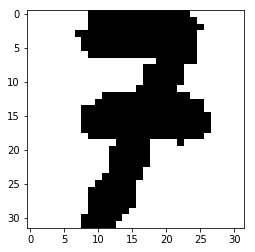

In [109]:
plt.imshow(train_data[120].reshape((32,32)), cmap='Greys')
plt.show()

In [110]:
k = np.arange(1,27,2)
acc = np.zeros(13)
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute', metric='euclidean')
    knn.fit(train_data, train_label)
    score = knn.score(test_data, test_label)
    acc[int((i-1)/2)] = score * 100

df = pd.DataFrame({'k': k, 'Overall Accuracy (%)':acc})
df = df[df.columns[::-1]]
print(df)

     k  Overall Accuracy (%)
0    1             99.549550
1    3             99.549550
2    5             99.324324
3    7             99.324324
4    9             98.873874
5   11             99.099099
6   13             99.099099
7   15             99.099099
8   17             98.648649
9   19             98.873874
10  21             98.198198
11  23             97.972973
12  25             97.972973


In [127]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='euclidean')
knn.fit(train_data, train_label)

time = timeit.default_timer()
knn_label = knn.predict(test_data)
time = timeit.default_timer() - time
print("Running time for all 444 test data is {} seconds".format(time))
print("Running time for a single query is {} seconds.".format(time / test_label.shape[0]))

confusion = np.zeros((10,10))
for i in range(test_label.shape[0]):
    confusion[test_label[i]][knn_label[i]] += 1
print(confusion)

Running time for all 444 test data is 0.07742244200198911 seconds
Running time for a single query is 0.00017437486937384934 seconds.
[[36.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 44.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0. 41.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 33.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 59.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 58.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 43.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 47.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 40.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0. 41.]]
